In [2]:
from torch.utils.data.dataloader import DataLoader
from lerobot.datasets.lerobot_dataset import LeRobotDataset
import torch
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

/home/may33/miniconda3/envs/tobotics/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device(type='cuda')

In [3]:
# delta_timestamps = {
#     "observation.images.up" : [-0.2, -0.1, 0.0] #what is this?
# }

repo_id = "lerobot/svla_so101_pickplace"

dataset = LeRobotDataset(repo_id=repo_id)

dataset

LeRobotDataset({
    Repository ID: 'lerobot/svla_so101_pickplace',
    Number of selected episodes: '50',
    Number of selected samples: '11939',
    Features: '['action', 'observation.state', 'observation.images.up', 'observation.images.side', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index']',
})',

In [4]:
dataset.features.keys()

dict_keys(['action', 'observation.state', 'observation.images.up', 'observation.images.side', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index'])

In [5]:
dataset[0]["observation.images.up"].shape

torch.Size([3, 480, 640])

In [6]:
batch_size = 16

data_loader = DataLoader(dataset=dataset, batch_size=batch_size)

In [ ]:
# for batch in data_loader:
#     observations = batch["observation.state"]
#     actions = batch["action"].to(device)
#     images_up = batch["observation.images.up"]
#     images_side = batch["observation.images.side"]


In [8]:
frames = dataset[100]["observation.images.up"]

frames.shape

torch.Size([3, 480, 640])

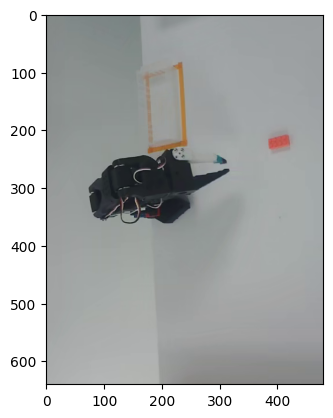

In [ ]:
image_cpu = frames.cpu().numpy()

plt.imshow(image_cpu.transpose(2, 1, 0))
plt.show()


In [10]:
len(dataset)

11939